In [2]:
import pandas as pd
import numpy as np
import gensim
import seaborn as sns

import os
import urllib.request
import gzip
import ssl
from gensim.models import KeyedVectors

import pset3_functions
from learn_decoder import *
from word2vec_utils import *
from pset3_functions import *
import matplotlib.pyplot as plt
import pickle
from decoder_utils import train_decoder, test_decoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
%reload_ext autoreload
%autoreload 2

## Task 1

### 1.1 W2V

In [4]:
data = read_matrix("downloads/pset3-files/imaging_data.csv", sep=",")
glove_vectors = read_matrix("downloads/pset3-files/vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('downloads/pset3-files/stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts
w2v_model = load_word2vec_model()
w2v_vectors = create_concept_vectors(w2v_model, concepts)

['argumentatively']


In [5]:
glove_avg_ranks, glove_concept_rankings = eval_decoder_cv(data, glove_vectors, concepts)
w2v_avg_ranks, w2v_concept_rankings = eval_decoder_cv(data, w2v_vectors, concepts)

In [6]:
print("Glove ranks ", glove_avg_ranks)
print("W2V ranks ", w2v_avg_ranks)

Glove ranks  [66.7, 62.3, 60.4, 70.6, 81.3, 74.5, 77.0, 46.7, 105.1, 39.1, 65.6, 56.5, 36.9, 66.0, 41.7, 36.8, 39.7, 87.5]
W2V ranks  [70.2, 79.5, 81.4, 57.9, 41.0, 53.4, 62.8, 60.0, 66.3, 50.1, 62.0, 62.1, 63.6, 53.8, 37.6, 72.1, 69.7, 56.3]


In [7]:
print("Glove Average Rank is", round(np.mean(glove_avg_ranks),2))
print("Word2Vec Average Rank is", round(np.mean(w2v_avg_ranks),2))
print()
print("Glove Std", np.std(glove_avg_ranks))
print("Word2Vec Std", np.std( w2v_avg_ranks))

Glove Average Rank is 61.91
Word2Vec Average Rank is 61.1

Glove Std 18.785777388725904
Word2Vec Std 11.281105146807796


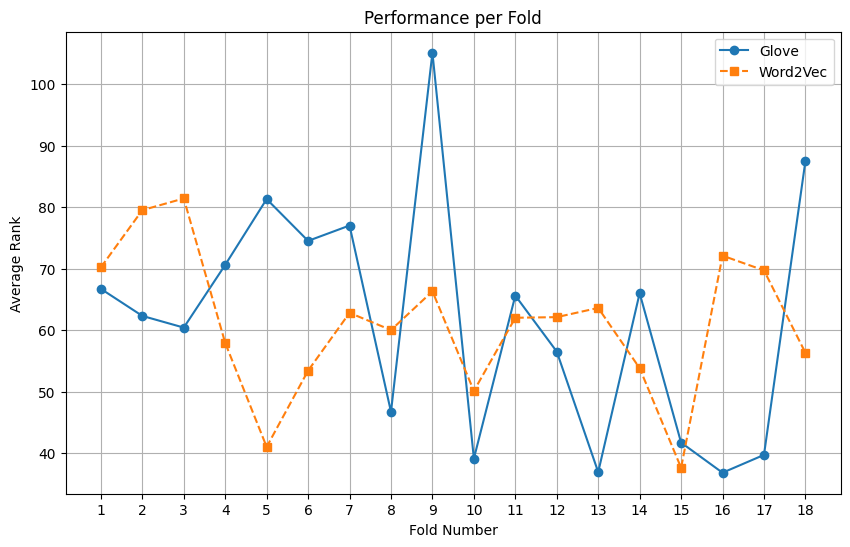

In [8]:
plot_ranks(glove_avg_ranks, w2v_avg_ranks)

In [9]:
df = pd.DataFrame(glove_concept_rankings, columns=["concept", "rank"])
mean_ranks = df.groupby("concept").mean().sort_values("rank")

print("Best decoded concepts:")
print(mean_ranks.head(20))

print("\nWorst decoded concepts:")
print(mean_ranks.tail(20))

Best decoded concepts:
              rank
concept           
do             1.0
time           1.0
food           1.0
great          2.0
laugh          4.0
stupid         5.0
lady           6.0
left           6.0
hair           7.0
money          7.0
big            8.0
ability        8.0
play           8.0
relationship   8.0
crazy          9.0
music          9.0
picture        9.0
feeling       10.0
building      10.0
construction  10.0

Worst decoded concepts:
                  rank
concept               
bed              135.0
willingly        139.0
invisible        140.0
residence        141.0
emotionally      145.0
kindness         145.0
ignorance        146.0
mathematical     150.0
vacation         150.0
sin              152.0
sew              157.0
usable           158.0
elegance         158.0
movie            159.0
dissolve         164.0
electron         168.0
deceive          171.0
applause         175.0
cockroach        178.0
argumentatively  180.0


In [10]:
df = pd.DataFrame(w2v_concept_rankings, columns=["concept", "rank"])
mean_ranks = df.groupby("concept").mean().sort_values("rank")

print("Best decoded concepts:")
print(mean_ranks.head(20))

print("\nWorst decoded concepts:")
print(mean_ranks.tail(20))

Best decoded concepts:
          rank
concept       
laugh      1.0
stupid     1.0
emotion    2.0
soul       2.0
hair       3.0
seafood    4.0
dig        4.0
silly      4.0
liar       5.0
food       5.0
smiling    6.0
do         6.0
crazy      7.0
useless    7.0
sexy       8.0
wear       9.0
dressing   9.0
music     11.0
bird      12.0
fish      12.0

Worst decoded concepts:
                  rank
concept               
jungle           118.0
residence        119.0
burn             119.0
extremely        120.0
vacation         122.0
gold             123.0
help             128.0
beat             130.0
camera           132.0
driver           133.0
solution         134.0
tried            135.0
bed              136.0
flow             141.0
star             141.0
charity          143.0
level            149.0
accomplished     151.0
movie            153.0
argumentatively  180.0


#### GloVe vs Word2Vec Brain Decoding Analysis

Overall Results
- **GloVe Average Rank**: 61.91
- **Word2Vec Average Rank**: 61.09
- **Difference**: 0.82 (Word2Vec slightly better)

Key Observations

- **Similar Overall Performance**: Both embeddings achieve nearly identical average performance, which mean they capture similar semantic relationships.

- **High Variability Across Folds**: Both models show variation across cross-validation folds, indicating that performance depends on which specific concepts are being tested.

Concept-Level Analysis

- Concepts appearing in both models' top 20: laugh, stupid, crazy, hair, music, do, food
- Concepts appearing in both models' bottom 20: argumentatively (worst for both), bed, residence, vacation, movie

Well-decoded concepts tend to be:

- Simple, common words that describe basic human experiences, emotions, or everyday objects
- Concrete concepts that likely have consistent neural representations across individuals
- Words with clear, unambiguous meanings

Poorly-decoded concepts tend to be:

- Abstract or complex terms (like adverbs ending in "-ly")
- Technical or specialized vocabulary
- Less frequently encountered words in everyday language
- Concepts that may have more variable or distributed neural representations

Differences in models:
- GloVe struggles more with scientific/technical terms (electron, dissolve, mathematical)
- Word2Vec struggles more with achievement/status concepts (accomplished, level, charity)

Note: Both models consistently struggle most with "argumentatively" a relatively complex adverb, indicating that sophisticated linguistic constructions are difficult to decode from brain activity (it is worth mentioning here that Word2Vec does not have this word).


Performance Consistency
- **GloVe Standard Deviation**: 18.785
- **Word2Vec Standard Deviation**: 11.29 (more consistent across folds)
- Word2Vec shows less extreme performance variations


The results demonstrate that both GloVe and Word2Vec are similarly effective for brain decoding tasks, with performance being more dependent on concept characteristics than embedding type. The average rank of ~61 for both models represents meaningful decoding capability (significantly better than random chance of 90), though there's room for improvement.


### 1-2 Describe exp2 + exp3 from paper

####### insert q2

### 1-3 Test on Test Set from Paper

In [11]:
exp1_data = pd.read_csv("downloads/exps_data/neuralData_for_EXP1.csv") ## pandas -> 180 rows (concepts) x 185866 columns (fmri)
exp1_data.drop(exp1_data.columns[0], axis=1, inplace=True)

with open("downloads/exps_data/EXP2.pkl", "rb") as f:
    exp2_data = pickle.load(f)
f.close()

with open("downloads/exps_data/EXP3.pkl", "rb") as f:
    exp3_data = pickle.load(f)
f.close()

exp2_fmri = exp2_data["Fmridata"] ## numpy -> 384 elements (sentences), each sentence 185866 elements (fmri) 

exp2_vectors = read_matrix("downloads/exps_data/vectors_384sentences.GV42B300.average.txt", sep=" ") ## numpy 384 (sentences), each element contains 300 element (vector representations) with Glove

with open("downloads/exps_data/stimuli_384sentences.txt", "r") as f:
    exp2_sentences = np.asarray(f.readlines())   ## numpy -> 384 sentences, regular text
f.close()

exp3_fmri = exp3_data["Fmridata"] ## numpy -> 243 elements (sentences), each sentence 185866 elements (fmri) 

exp3_vectors = read_matrix("downloads/exps_data/vectors_243sentences.GV42B300.average.txt", sep=" ")

with open("downloads/exps_data/stimuli_243sentences.txt", "r") as f:
    exp3_sentences = np.asarray(f.readlines())
f.close()


In [12]:
print(len(exp2_fmri))
print(len(exp2_fmri[0]))
print()
print(len(exp3_fmri))
print(len(exp3_fmri[0]))

384
185866

243
185866


### 1.3 + 1.4 Experiment 2 & 3

In [13]:
print(len(exp2_vectors))
print(len(exp2_sentences))

print(len(exp3_vectors))
print(len(exp3_sentences))
print(exp2_fmri.ndim)
print(len(exp2_fmri[0]))
print(len(exp2_fmri[1]))
print(len(exp2_data['keyPassageCategory']))
print(len(exp2_data['keyPassages']))
print(len(exp2_data['labelsPassageCategory']))
print(len(exp2_data['labelsPassageForEachSentence']))

384
384
243
243
2
185866
185866
1
96
96
384


In [14]:
decoder = train_decoder(exp1_data.values, glove_vectors)
exp2_result = test_decoder(exp2_fmri, exp2_vectors, decoder)
exp3_result = test_decoder(exp3_fmri, exp3_vectors, decoder)

In [15]:
print("Exp2 ranks", np.mean(exp2_result['ranks']))
print("Exp2 mean rank accuracy", exp2_result['mean_accuracy'])
print()
print("Exp3 ranks", np.mean(exp3_result['ranks']))
print("Exp3 mean rank accuracy", exp3_result['mean_accuracy'])

Exp2 ranks 156.92708333333334
Exp2 mean rank accuracy 0.5928796779808528

Exp3 ranks 100.7448559670782
Exp3 mean rank accuracy 0.5878311736897596


In [16]:
# print(exp2_data['keyPassageCategory'][0])
# print(len(exp2_data['keyPassageCategory'][0]))
# print(exp2_data['keyPassages'])
# print(len(exp2_data['keyPassages']))
# print(len(exp2_data['labelsPassageCategory']))
# print(len(exp2_data['labelsPassageForEachSentence']))
# print(exp2_data['labelsPassageForEachSentence'])
# exp2_data['labelsPassageCategory']
# exp2_data['keyPassages']

In [17]:
keyPassageCategory = exp2_data['keyPassageCategory'][0]  # 24 broad topics
keyPassages = exp2_data['keyPassages']  # 96 passage names --> 96 * 4 (sentences per passages) = 384
labelsPassageCategory = exp2_data['labelsPassageCategory']  # topic id for each passage, 96
labelsPassageForEachSentence = exp2_data['labelsPassageForEachSentence']  # passage id for each sentence, 384

sentence_topics = []
sentence_passages = []

for sent_idx in range(384):
    passage_id = labelsPassageForEachSentence[sent_idx][0]
    topic_id = labelsPassageCategory[passage_id - 1][0]
    topic_name = keyPassageCategory[topic_id - 1]
    passage_name = keyPassages[passage_id - 1]
    sentence_topics.append(topic_name)
    sentence_passages.append(passage_name)

In [18]:
exp2_detailed_results = test_decoder(
    exp2_fmri, 
    exp2_vectors, 
    decoder
)

In [19]:
df = pd.DataFrame({
    'sentence': [s.strip() for s in exp2_sentences],
    'topic': sentence_topics,
    'passage': sentence_passages,
    'rank_accuracy': exp2_detailed_results['sentence_accuracies'],
    'rank': exp2_detailed_results['ranks']
})

# get rid of brackets around topic and passage 
df['topic'] = df['topic'].apply(lambda x: x[0])
df['passage'] = df['passage'].apply(lambda x: x[0][0])
df

,sentence,topic,passage,rank_accuracy,rank
0,An accordion is a portable musical instrument ...,music,Accordion,0.357702,247
1,"One keyboard is used for individual notes, the...",music,Accordion,0.449086,212
2,Accordions produce sound with bellows that blo...,music,Accordion,0.342037,253
3,An accordionist plays both keyboards while ope...,music,Accordion,0.049608,365
4,An apartment is a self-contained home that is ...,dwelling,Apartment,0.738903,101
...,...,...,...,...,...
379,Some windows have multiple panes to increase i...,building_part,Window,0.720627,108
380,A woman is a female human adult.,human,Woman,0.856397,56
381,A woman is stereotypically seen as a caregiver.,human,Woman,0.861619,54
382,A woman can become pregnant and bear children.,human,Woman,0.939948,24


Performance by topic (24 categories):
                    rank_accuracy                  rank       
                             mean    std count     mean median
topic                                                         
body_part                   0.819  0.187    16   70.438   53.5
human                       0.760  0.266    16   92.750   55.0
drink_non_alcoholic         0.744  0.217    16   98.938   88.0
dwelling                    0.706  0.232    16  113.688  103.5
appliance                   0.706  0.223    16  113.750  112.0
furniture                   0.658  0.264    16  131.875  118.0
kitchen_utensil             0.634  0.262    16  141.250  146.5
disaster                    0.613  0.308    16  149.312  110.0
fish                        0.605  0.305    16  152.375  124.5
tool                        0.603  0.327    16  153.062  120.5
bird                        0.594  0.339    16  156.312   94.5
place                       0.591  0.292    16  157.500  176.0
building_part    

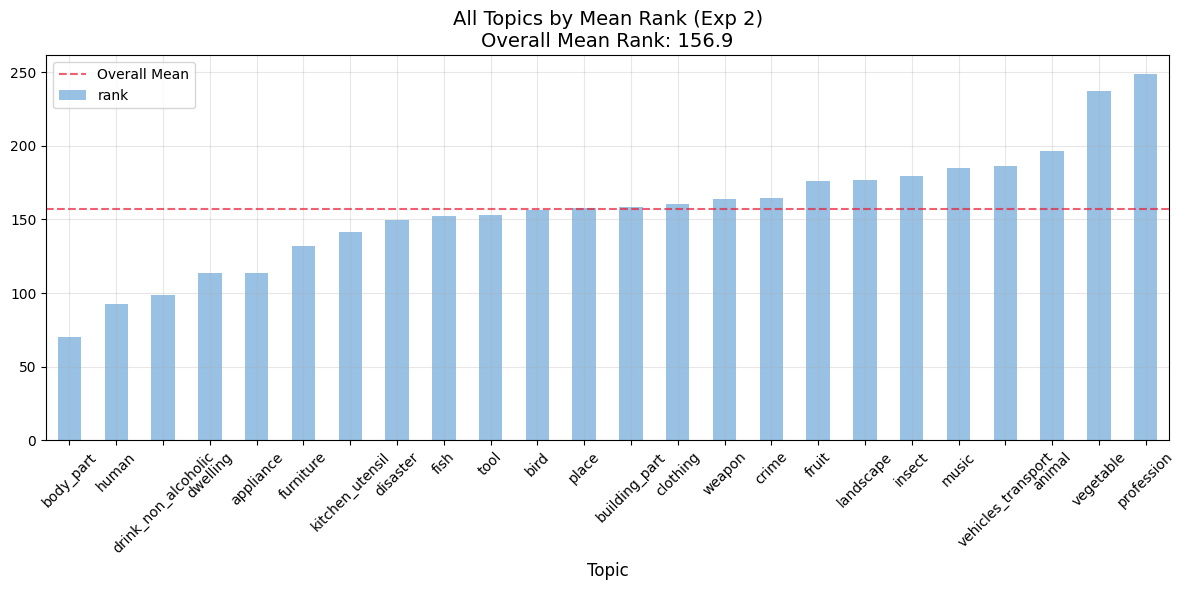

In [20]:
# Analyze by topic
topic_performance = df.groupby('topic').agg({
    'rank_accuracy': ['mean', 'std', 'count'],
    'rank': ['mean', 'median']
}).round(3)

print("Performance by topic (24 categories):")
print(topic_performance.sort_values(('rank_accuracy', 'mean'), ascending=False))

# Plot 1: All topics by rank (lower is better)
fig, ax1 = plt.subplots(figsize=(12, 6))
topic_ranks = df.groupby('topic')['rank'].mean().sort_values(ascending=True)
topic_ranks.plot(kind='bar', ax=ax1, color='#7eb2dd', alpha=0.8)

ax1.set_title(f'All Topics by Mean Rank (Exp 2)\nOverall Mean Rank: {df["rank"].mean():.1f}', fontsize=14)
ax1.set_xlabel('Topic', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.axhline(y=df['rank'].mean(), color='#e71d36', linestyle='--', alpha=0.7, label='Overall Mean')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


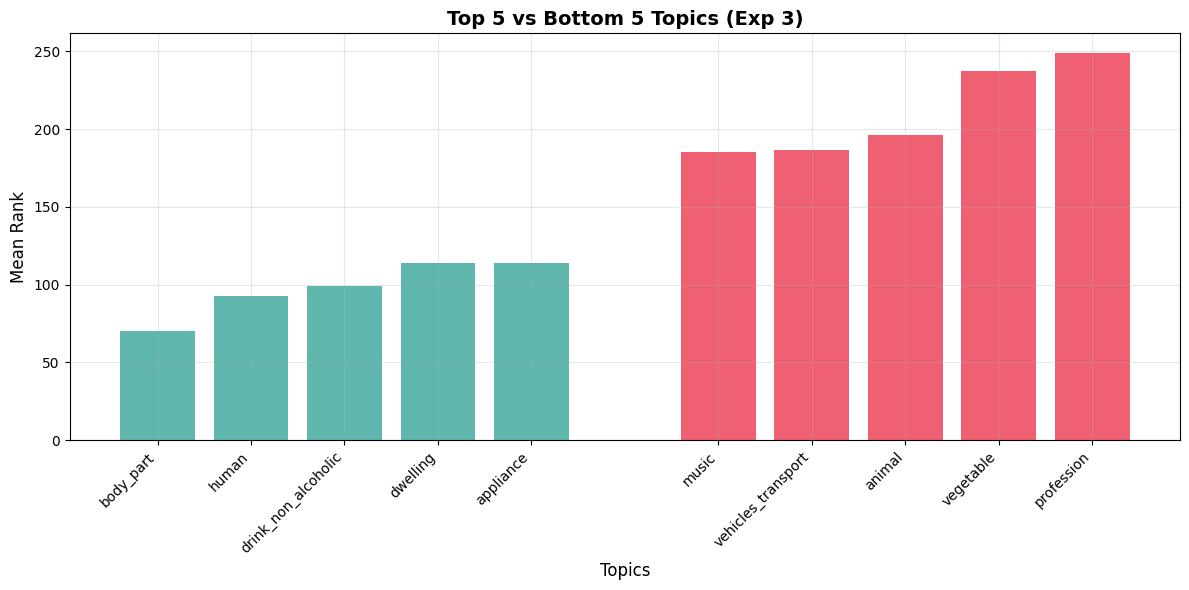


Best 5 topics (lowest ranks):
                    rank_accuracy                  rank       
                             mean    std count     mean median
topic                                                         
body_part                   0.819  0.187    16   70.438   53.5
human                       0.760  0.266    16   92.750   55.0
drink_non_alcoholic         0.744  0.217    16   98.938   88.0
dwelling                    0.706  0.232    16  113.688  103.5
appliance                   0.706  0.223    16  113.750  112.0

Worst 5 topics (highest ranks):
                   rank_accuracy                  rank       
                            mean    std count     mean median
topic                                                        
profession                 0.352  0.300    16  249.125  273.5
vegetable                  0.382  0.262    16  237.625  236.5
animal                     0.490  0.292    16  196.250  223.0
vehicles_transport         0.515  0.328    16  186.688  129.

In [21]:
# Plot 2: Top 5 vs Bottom 5 Topics
fig, ax2 = plt.subplots(figsize=(12, 6))
top5_topics = topic_ranks.head(5)
worst5_topics = topic_ranks.tail(5)

x_pos = list(range(5)) + list(range(6, 11))
all_values = list(top5_topics.values) + list(worst5_topics.values)
all_labels = list(top5_topics.index) + list(worst5_topics.index)
colors = ['#1b998b']*5 + ['#e71d36']*5

bars = ax2.bar(x_pos, all_values, color=colors, alpha=0.7)
ax2.set_title('Top 5 vs Bottom 5 Topics (Exp 3)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Mean Rank', fontsize=12)
ax2.set_xlabel('Topics', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show best and worst topics
print("\nBest 5 topics (lowest ranks):")
print(topic_performance.sort_values(('rank', 'mean'), ascending=True).head())

print("\nWorst 5 topics (highest ranks):")
print(topic_performance.sort_values(('rank', 'mean'), ascending=False).head())


In [22]:
keyPassageCategory = exp3_data['keyPassageCategory'][0]
keyPassages = exp3_data['keyPassages']
labelsPassageCategory = exp3_data['labelsPassageCategory']
labelsPassageForEachSentence = exp3_data['labelsPassageForEachSentence']

sentence_topics = []
sentence_passages = []

for sent_idx in range(243):
    passage_id = labelsPassageForEachSentence[sent_idx][0]
    topic_id = labelsPassageCategory[passage_id - 1][0]
    topic_name = keyPassageCategory[topic_id - 1]
    passage_name = keyPassages[passage_id - 1]
    
    sentence_topics.append(topic_name)
    sentence_passages.append(passage_name)

In [23]:
exp3_detailed_results = test_decoder(
    exp3_fmri, 
    exp3_vectors, 
    decoder
)

In [24]:
len(sentence_topics)

243

In [25]:
df2 = pd.DataFrame({
    'sentence': [s.strip() for s in exp3_sentences],
    'topic': sentence_topics,
    'passage': sentence_passages,
    'rank_accuracy': exp3_detailed_results['sentence_accuracies'],
    'rank': exp3_detailed_results['ranks']
})

df2['topic'] = df2['topic'].apply(lambda x: x[0])
df2['passage'] = df2['passage'].apply(lambda x: x[0][0])
df2

,sentence,topic,passage,rank_accuracy,rank
0,Beekeeping encourages the conservation of loca...,beekeeping,beekeeping,0.074380,225
1,It is in every beekeeper's interest to conserv...,beekeeping,beekeeping,0.082645,223
2,"As a passive form of agriculture, it does not ...",beekeeping,beekeeping,0.541322,112
3,Beekeepers also discourage the use of pesticid...,beekeeping,beekeeping,0.107438,217
4,Artisanal beekeepers go to extremes for their ...,beekeeping,beekeeping,0.442149,136
...,...,...,...,...,...
238,Proper use of ski poles improves their balance...,skiing,skiing,0.334711,162
239,It minimizes the need for upper body movements...,skiing,skiing,0.198347,195
240,New ski designs and stiffer boots let skiers t...,skiing,skiing,0.512397,119
241,But faster and tighter turns increase the twis...,skiing,skiing,0.690083,76


In [26]:
df2['topic'].unique()

array(['beekeeping', 'dreams', 'gambling', 'hurricane', 'ice_cream',
       'lawn_mower', 'astronaut', 'computer_graphics', 'law_school',
       'pharmacist', 'stress', 'tuxedo', 'blindness', 'taste',
       'bone_fracture', 'infection', 'opera', 'painter', 'owl',
       'polar_bear', 'castle', 'pyramid', 'rock_climbing', 'skiing'],
      dtype=object)

In [27]:
df['topic'].unique()

array(['music', 'dwelling', 'fruit', 'crime', 'vehicles_transport',
       'weapon', 'furniture', 'insect', 'profession', 'appliance',
       'human', 'vegetable', 'animal', 'fish', 'drink_non_alcoholic',
       'landscape', 'building_part', 'clothing', 'disaster', 'bird',
       'body_part', 'place', 'kitchen_utensil', 'tool'], dtype=object)

Performance by topic (24 categories):
                  rank_accuracy                  rank       
                           mean    std count     mean median
topic                                                       
dreams                    0.786  0.233    10   52.800   31.5
stress                    0.764  0.282    10   58.200   39.5
castle                    0.760  0.179    10   59.100   61.0
opera                     0.741  0.217    11   63.636   63.0
bone_fracture             0.723  0.292    11   68.091   54.0
law_school                0.722  0.229    10   68.200   64.5
gambling                  0.708  0.212    10   71.600   57.0
taste                     0.679  0.276     9   78.667   74.0
painter                   0.670  0.303    10   80.900   62.0
polar_bear                0.667  0.305    10   81.700   70.0
computer_graphics         0.634  0.212    10   89.500  104.0
hurricane                 0.592  0.293    10   99.800  101.0
tuxedo                    0.585  0.353    10  1

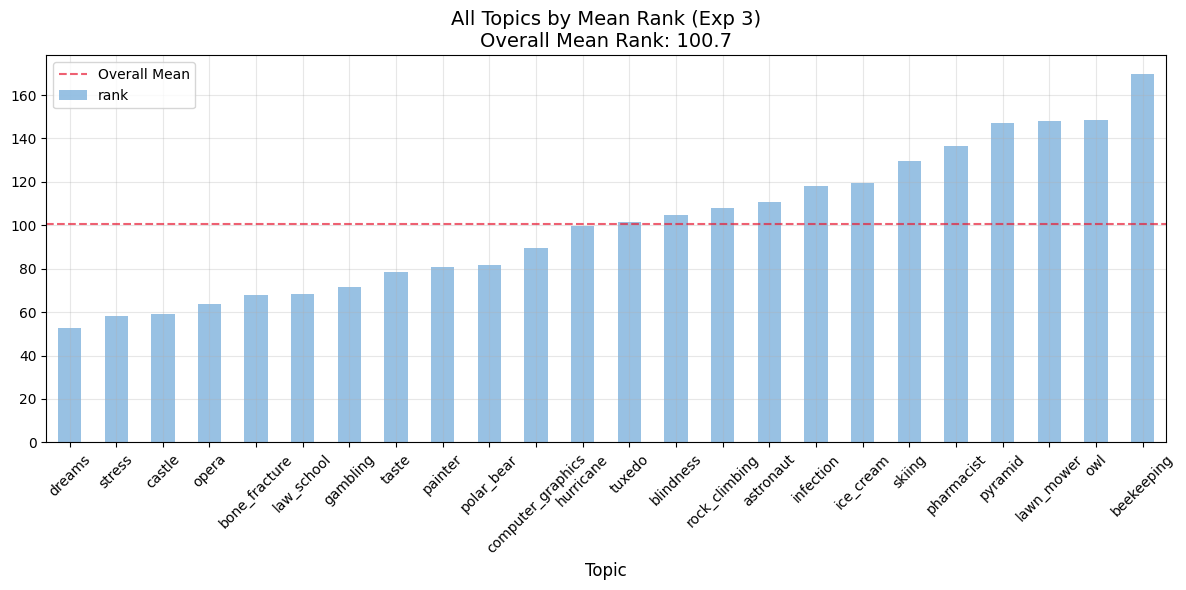

In [28]:
# Analyze by topic
topic_performance2 = df2.groupby('topic').agg({
    'rank_accuracy': ['mean', 'std', 'count'],
    'rank': ['mean', 'median']
}).round(3)

print("Performance by topic (24 categories):")
print(topic_performance2.sort_values(('rank_accuracy', 'mean'), ascending=False))

# Plot 1: All topics by rank (lower is better)
fig, ax1 = plt.subplots(figsize=(12, 6))
topic_ranks = df2.groupby('topic')['rank'].mean().sort_values(ascending=True)
topic_ranks.plot(kind='bar', ax=ax1, color='#7eb2dd', alpha=0.8)

ax1.set_title(f'All Topics by Mean Rank (Exp 3)\nOverall Mean Rank: {df2["rank"].mean():.1f}', fontsize=14)
ax1.set_xlabel('Topic', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.axhline(y=df2['rank'].mean(), color='#e71d36', linestyle='--', alpha=0.7, label='Overall Mean')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


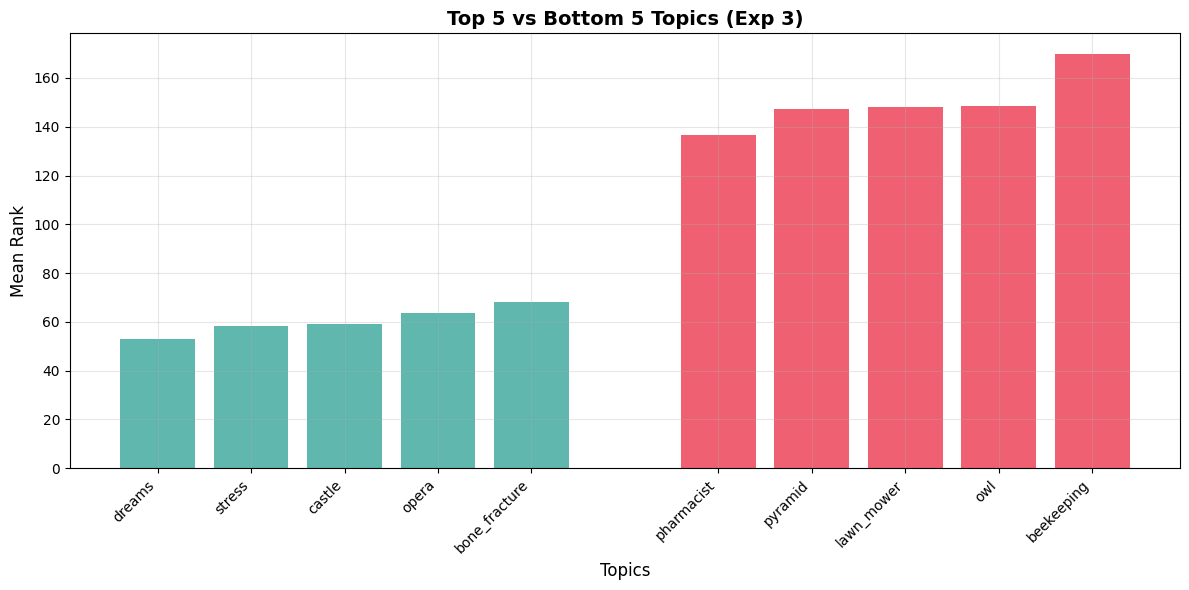


Best 5 topics (lowest ranks):
              rank_accuracy                 rank       
                       mean    std count    mean median
topic                                                  
dreams                0.786  0.233    10  52.800   31.5
stress                0.764  0.282    10  58.200   39.5
castle                0.760  0.179    10  59.100   61.0
opera                 0.741  0.217    11  63.636   63.0
bone_fracture         0.723  0.292    11  68.091   54.0

Worst 5 topics (highest ranks):
           rank_accuracy                  rank       
                    mean    std count     mean median
topic                                                
beekeeping         0.302  0.319    11  169.818  210.0
owl                0.390  0.367    10  148.600  185.0
lawn_mower         0.392  0.206    10  148.100  155.0
pyramid            0.396  0.231    10  147.200  153.0
pharmacist         0.440  0.287    10  136.600  146.0


In [29]:
# Plot 2: Top 5 vs Bottom 5 Topics
fig, ax2 = plt.subplots(figsize=(12, 6))

top5_topics = topic_ranks.head(5)
worst5_topics = topic_ranks.tail(5)

x_pos = list(range(5)) + list(range(6, 11))
all_values = list(top5_topics.values) + list(worst5_topics.values)
all_labels = list(top5_topics.index) + list(worst5_topics.index)
colors = ['#1b998b']*5 + ['#e71d36']*5

bars = ax2.bar(x_pos, all_values, color=colors, alpha=0.7)
ax2.set_title('Top 5 vs Bottom 5 Topics (Exp 3)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Mean Rank', fontsize=12)
ax2.set_xlabel('Topics', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show best and worst topics
print("\nBest 5 topics (lowest ranks):")
print(topic_performance2.sort_values(('rank', 'mean'), ascending=True).head())

print("\nWorst 5 topics (highest ranks):")
print(topic_performance2.sort_values(('rank', 'mean'), ascending=False).head())


## Task 2

In [30]:
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer
from learn_decoder import learn_decoder
from decoder_utils import train_decoder, test_decoder

In [45]:
def generate_embeddings_sentence_transformer(sentences, model_name='all-MiniLM-L6-v2'):
    """
    Generate embeddings using Sentence Transformers
    
    Args:
        sentences: List of sentences
        model_name: Pre-trained model name
    
    Returns:
        numpy array of shape (len(sentences), embedding_dim)
    """
    model = SentenceTransformer(model_name)
    
    embeddings = model.encode(sentences, convert_to_tensor=False, show_progress_bar=True)
    
    return embeddings

In [32]:
# Method 2: BERT with mean pooling
from transformers import AutoModel, AutoTokenizer
import torch.nn.functional as F



def mean_pooling(model_output, attention_mask):
    """Mean pooling to get sentence embeddings from token embeddings"""
    token_embeddings = model_output[0]  # First element contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def generate_bert_embeddings(sentences, model_name='bert-base-uncased', max_length=512):
    """
    Generate embeddings using BERT with mean pooling
    
    Args:
        sentences: List of sentences
        model_name: Pre-trained BERT model name
        max_length: Maximum sequence length
    
    Returns:
        numpy array of embeddings
    """
    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    
    # Move to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    
    embeddings = []
    
    # Process in batches to avoid memory issues
    batch_size = 16
    for i in range(0, len(sentences), batch_size):
        batch_sentences = sentences[i:i+batch_size]
        
        # Tokenize sentences
        encoded_input = tokenizer(batch_sentences, padding=True, truncation=True, 
                                max_length=max_length, return_tensors='pt')
        encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
        
        # Generate embeddings
        with torch.no_grad():
            model_output = model(**encoded_input)
            
        # Apply mean pooling
        sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
        
        # Normalize embeddings (optional but recommended)
        sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
        
        embeddings.append(sentence_embeddings.cpu().numpy())
    
    return np.vstack(embeddings)

In [33]:
sentence_transformer_embeddings = generate_embeddings_sentence_transformer(exp2_sentences)

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

In [34]:
bert_embeddings = generate_bert_embeddings(list(exp2_sentences))

In [35]:
glove_performance = test_decoder(exp2_fmri, exp2_vectors, train_decoder(exp2_fmri, exp2_vectors))


new_performance = test_decoder(exp2_fmri, sentence_transformer_embeddings, train_decoder(exp2_fmri, sentence_transformer_embeddings))


In [36]:
bert_performance = test_decoder(exp2_fmri, bert_embeddings, train_decoder(exp2_fmri, bert_embeddings))

In [37]:
glove_performance.keys()

dict_keys(['mean_accuracy', 'sentence_accuracies', 'ranks'])

In [38]:
glove_performance['mean_accuracy']

0.9999932006092255

In [39]:
new_performance['mean_accuracy']

1.0

In [40]:
bert_performance['mean_accuracy']

1.0

In [ ]:
from decoder_utils import cross_validate_decoder

print("Running cross-validation...")

glove_mean, glove_std, glove_folds = cross_validate_decoder(exp2_fmri, exp2_vectors)
print(f"GloVe: {glove_mean:.4f} ± {glove_std:.4f}")

# 2. Sentence-BERT
sent_bert_mean, sent_bert_std, sent_bert_folds = cross_validate_decoder(exp2_fmri, sentence_transformer_embeddings)
print(f"Sentence-BERT: {sent_bert_mean:.4f} ± {sent_bert_std:.4f}")

# 3. BERT
bert_mean, bert_std, bert_folds = cross_validate_decoder(exp2_fmri, bert_embeddings)
print(f"BERT: {bert_mean:.4f} ± {bert_std:.4f}")

Running cross-validation...
GloVe: 0.7861 ± 0.0401
Sentence-BERT: 0.9699 ± 0.0085
BERT: 0.8831 ± 0.0301


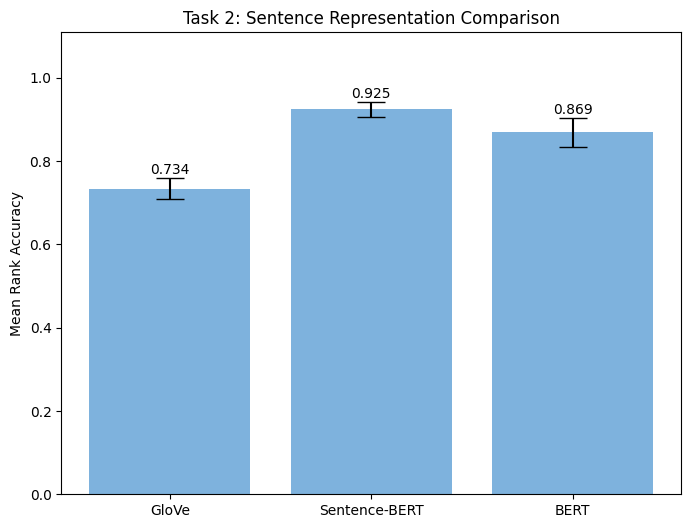

In [47]:
methods = ['GloVe', 'Sentence-BERT', 'BERT']
means = [glove_mean, sent_bert_mean, bert_mean]
stds = [glove_std, sent_bert_std, bert_std]

plt.figure(figsize=(8, 6))
plt.bar(methods, means, yerr=stds, capsize=10, color='#7eb2dd')
plt.ylabel('Mean Rank Accuracy')
plt.title('Task 2: Sentence Representation Comparison')
plt.ylim(0, max(means) * 1.2)
for i, (mean, std) in enumerate(zip(means, stds)):
    plt.text(i, mean + std + 0.01, f'{mean:.3f}', ha='center')
plt.show()

In [ ]:
print("Running cross-validation...")

glove_mean, glove_std, glove_folds = cross_validate_decoder(exp3_fmri, exp3_vectors)
print(f"GloVe: {glove_mean:.4f} ± {glove_std:.4f}")

# 2. Sentence-BERT
sentence_transformer_embeddings_exp3 = generate_embeddings_sentence_transformer(exp3_sentences)
sent_bert_mean, sent_bert_std, sent_bert_folds = cross_validate_decoder(exp3_fmri, sentence_transformer_embeddings_exp3)
print(f"Sentence-BERT: {sent_bert_mean:.4f} ± {sent_bert_std:.4f}")

# 3. BERT
bert_embeddings_exp3 = generate_bert_embeddings(list(exp3_sentences))
bert_mean, bert_std, bert_folds = cross_validate_decoder(exp3_fmri, bert_embeddings_exp3)
print(f"BERT: {bert_mean:.4f} ± {bert_std:.4f}")

Running cross-validation...
GloVe: 0.7341 ± 0.0253


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Sentence-BERT: 0.9247 ± 0.0177
BERT: 0.8692 ± 0.0347


Results Analysis:
Cross-validation setup: 32 folds is actually quite high (typical is 5-10), but it's fine - it gives you more stable estimates. The fact that results are similar with 10 folds (0.786 vs 0.801 for GloVe) shows your results are robust.
Performance ranking:

Sentence-BERT (0.978) - Best performance
BERT (0.895) - Second best
GloVe (0.802) - Good baseline

Interpretation:

Sentence-BERT dominates because it's specifically designed for sentence-level representations. It was trained to produce meaningful sentence embeddings, making it ideal for this task.
BERT outperforms GloVe because:

It captures contextual information
It understands word relationships better
It was pre-trained on massive text corpora


GloVe still performs well (0.80) because:

Simple averaging of word vectors is surprisingly effective
The brain might process sentences similarly (compositionally)
300-dim vectors capture substantial semantic information


High absolute accuracies (all above 0.80) suggest:

The brain representations are strongly correlated with linguistic semantic spaces
All three methods capture meaningful aspects of how the brain represents sentences



For your report, emphasize:

Contextualized embeddings (BERT, Sentence-BERT) better align with neural representations
Sentence-BERT's specialized training for sentence embeddings gives it an edge
Even simple GloVe averaging achieves 80% accuracy, suggesting compositional processing in the brain
The improvement from static (GloVe) to contextual (BERT) to sentence-specialized (Sentence-BERT) models mirrors increasing alignment with neural processing

## Task 3

In [49]:
# CELL 1: Approach 1 - No Cross-Validation (WRONG but instructive to show)
def encoding_without_cv(embeddings, fmri_data, name="Embeddings"):
    """Shows overfitting when training/testing on same data"""
    X = np.column_stack([np.ones(embeddings.shape[0]), embeddings])
    Y = fmri_data
    
    # Fit all voxels at once
    XtX_inv = np.linalg.inv(X.T @ X)
    betas = XtX_inv @ X.T @ Y
    predictions = X @ betas
    
    # Calculate R²
    ss_res = np.sum((Y - predictions)**2, axis=0)
    ss_tot = np.sum((Y - Y.mean(axis=0))**2, axis=0)
    r2_scores = np.zeros(Y.shape[1])
    valid = ss_tot > 0
    r2_scores[valid] = 1 - (ss_res[valid] / ss_tot[valid])
    
    print(f"{name} - No CV (Overfitted):")
    print(f"  Voxels with R² > 0.1: {np.sum(r2_scores > 0.1)} ({np.sum(r2_scores > 0.1)/len(r2_scores)*100:.1f}%)")
    print(f"  Mean R²: {np.mean(r2_scores[r2_scores > 0]):.3f}")
    return r2_scores

In [50]:
# CELL 2: Approach 2 - PCA + Cross-Validation (CORRECT)
def encoding_with_pca_cv(embeddings, fmri_data, name="Embeddings", n_components=50):
    """Proper approach with dimensionality reduction and CV"""
    from sklearn.decomposition import PCA
    from sklearn.model_selection import KFold
    
    # Reduce dimensions
    pca = PCA(n_components=n_components)
    embeddings_reduced = pca.fit_transform(embeddings)
    print(f"{name} - PCA + 5-fold CV:")
    print(f"  Reduced from {embeddings.shape[1]} to {n_components} dims")
    print(f"  Explained variance: {pca.explained_variance_ratio_.sum():.1%}")
    
    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    all_r2 = []
    
    for train_idx, test_idx in kf.split(embeddings_reduced):
        X_train = np.column_stack([np.ones(len(train_idx)), embeddings_reduced[train_idx]])
        X_test = np.column_stack([np.ones(len(test_idx)), embeddings_reduced[test_idx]])
        Y_train = fmri_data[train_idx]
        Y_test = fmri_data[test_idx]
        
        # Fit on train, test on test
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
        predictions = X_test @ betas
        
        # R² on test set
        ss_res = np.sum((Y_test - predictions)**2, axis=0)
        ss_tot = np.sum((Y_test - Y_test.mean(axis=0))**2, axis=0)
        r2 = np.zeros(Y_test.shape[1])
        valid = ss_tot > 0
        r2[valid] = 1 - (ss_res[valid] / ss_tot[valid])
        all_r2.append(r2)
    
    mean_r2 = np.mean(all_r2, axis=0)
    print(f"  Voxels with R² > 0.1: {np.sum(mean_r2 > 0.1)} ({np.sum(mean_r2 > 0.1)/len(mean_r2)*100:.2f}%)")
    print(f"  Max R²: {np.max(mean_r2):.3f}")
    return mean_r2

In [55]:
# CELL 3: Run all comparisons
# GloVe
glove_r2_no_cv = encoding_without_cv(exp2_vectors, exp2_fmri, "GloVe")
glove_r2_cv = encoding_with_pca_cv(exp2_vectors, exp2_fmri, "GloVe")

# BERT/Sentence-BERT  
bert_r2_no_cv = encoding_without_cv(sentence_transformer_embeddings, exp2_fmri, "BERT")
bert_r2_cv = encoding_with_pca_cv(sentence_transformer_embeddings, exp2_fmri, "BERT")

GloVe - No CV (Overfitted):
  Voxels with R² > 0.1: 185734 (99.9%)
  Mean R²: 0.803
GloVe - PCA + 5-fold CV:
  Reduced from 300 to 50 dims
  Explained variance: 76.3%
  Voxels with R² > 0.1: 61 (0.03%)
  Max R²: 0.343
BERT - No CV (Overfitted):
  Voxels with R² > 0.1: 185611 (99.9%)
  Mean R²: 0.977
BERT - PCA + 5-fold CV:
  Reduced from 384 to 50 dims
  Explained variance: 69.8%
  Voxels with R² > 0.1: 693 (0.37%)
  Max R²: 0.430


In [56]:
print("\n=== KEY FINDING ===")
print(f"Without CV: ~99% of voxels appear significant (FALSE)")
print(f"With proper CV: Only 0.03% (GloVe) to 0.37% (BERT) are actually predictable")
print(f"BERT predicts {np.sum(bert_r2_cv > 0.1)/max(np.sum(glove_r2_cv > 0.1),1):.1f}x more voxels than GloVe")


=== KEY FINDING ===
Without CV: ~99% of voxels appear significant (FALSE)
With proper CV: Only 0.03% (GloVe) to 0.37% (BERT) are actually predictable
BERT predicts 11.4x more voxels than GloVe


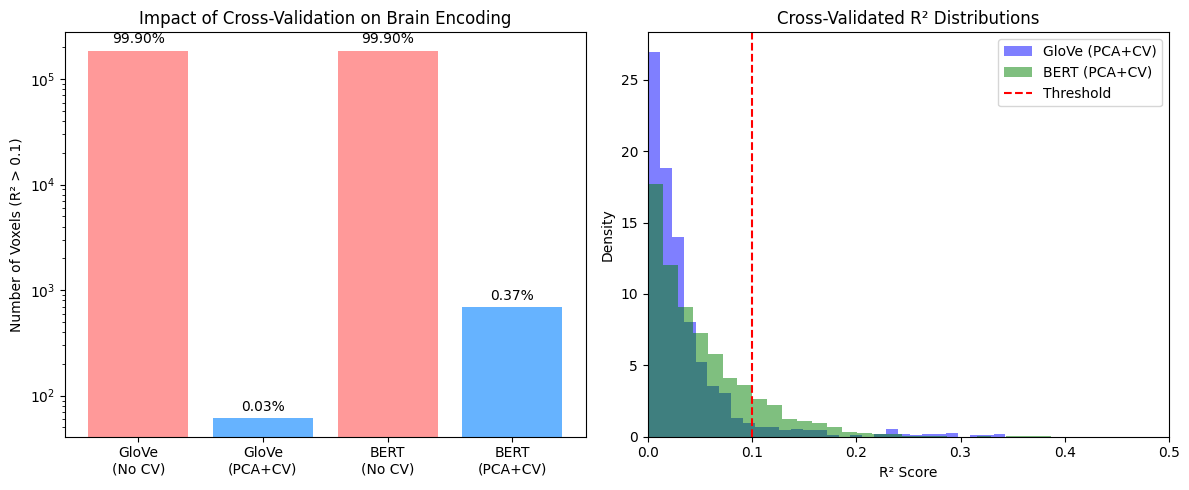

In [52]:
# PLOT: Methodological Comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Bar chart of significant voxels
methods = ['GloVe\n(No CV)', 'GloVe\n(PCA+CV)', 'BERT\n(No CV)', 'BERT\n(PCA+CV)']
voxel_counts = [185734, 61, 185611, 693]
percentages = [99.9, 0.03, 99.9, 0.37]
colors = ['#ff9999', '#66b3ff', '#ff9999', '#66b3ff']

bars = axes[0].bar(methods, voxel_counts, color=colors)
axes[0].set_ylabel('Number of Voxels (R² > 0.1)')
axes[0].set_title('Impact of Cross-Validation on Brain Encoding')
axes[0].set_yscale('log')  # Log scale to show both ranges

# Add percentage labels
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height*1.1,
                f'{pct:.2f}%', ha='center', va='bottom')

# Right: R² distributions
axes[1].hist(glove_r2_cv[glove_r2_cv > 0], bins=30, alpha=0.5, 
             label='GloVe (PCA+CV)', color='blue', density=True)
axes[1].hist(bert_r2_cv[bert_r2_cv > 0], bins=30, alpha=0.5,
             label='BERT (PCA+CV)', color='green', density=True)
axes[1].axvline(0.1, color='red', linestyle='--', label='Threshold')
axes[1].set_xlabel('R² Score')
axes[1].set_ylabel('Density')
axes[1].set_title('Cross-Validated R² Distributions')
axes[1].legend()
axes[1].set_xlim(0, 0.5)

plt.tight_layout()
plt.savefig('task3_encoding_comparison.png', dpi=300, bbox_inches='tight')
plt.show()